In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
sys.path.append('../')
from package_global_functions import *

extSSDpath = getExternalSSDpath()
if os.path.exists(extSSDpath):
    path = extSSDpath + getProjectFoldername() + '/sim_some_params_rework/results'
else:
    path = '/results'

In [65]:
Nsites = 2
N = 500
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')

### Different system sizes, q1=7, q2=10, pis=0

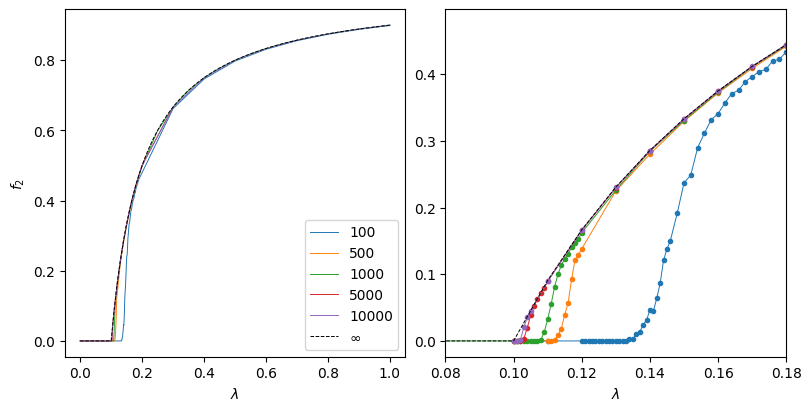

In [67]:
pi1, pi2 = 0.0, 0.0
q1, q2 = 7.0, 10.0

fig, ax = plt.subplots(1,2, figsize=(8,4), constrained_layout=True)
# fig, ax = plt.subplots(1,3, figsize=(12,4), constrained_layout=True)
for N in [100, 500, 1000, 5000, 10000]:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax[0].plot(df['l'], df['f2'], label=f'{N}', lw=0.7)
    df = df.query('l >= 0.05 & l <0.2')
    ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, marker='.')
    # df = df.query('l >= 0.1 & l <0.2')
    # df['lmod'] = (df['l']-0.1)*100
    # ax[2].plot(df['lmod'], df['f2'], label=f'{N}', lw=0.7, marker='.')

# results from the deterministic equations
df = pd.read_csv(extSSDpath + getProjectFoldername() + f'/det_sols_from_polynomial/res_files/lambdaEvo_pi1_{pi1}_pi2_{pi2}_q1_{q1}_q2_{q2}.csv')
ax[0].plot(df['l'], df['f2'], lw=0.7, color='xkcd:black', ls='--', label=r'$\infty$')
df = df.query('l >= 0.05 & l <0.2')
ax[1].plot(df['l'], df['f2'], label=f'{N}', lw=0.7, color='xkcd:black', ls='--')
ax[1].set_xlim(0.08, 0.18)
# ax[2].set_xlim(0.0, 0.1)
ax[0].set_xlabel(r'$\lambda$')
ax[1].set_xlabel(r'$\lambda$')
ax[0].set_ylabel(r'$f_2$')
ax[0].legend()
fig.savefig(f'sim_at_pis_0_difN_q1_{q1}_q2_{q2}.png')

### System size N=1000, different q1s, q2=10, pis=0

Text(0, 0.5, '$f_2$')

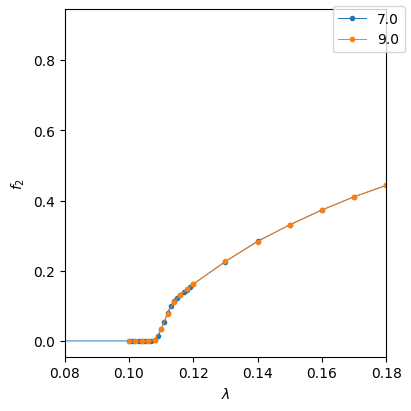

In [11]:
fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
Nsites = 2
q1s, q2 = [7.0, 9.0], 10.0
pi1, pi2 = 0.0, 0.0
N = 1000
for q1 in q1s:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
    ax.plot(df['l'], df['f2'], label=f'{q1}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_2$')

### System size N=1000, varying the number of sites, q1,...,qk-1 = 7.0, qk = 10, pis=0.0

Text(0, 0.5, '$f_k$')

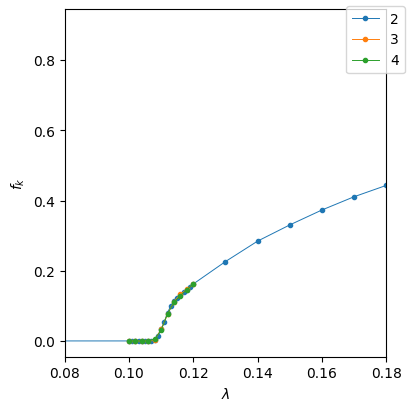

In [17]:
Nsitess = [2,3,4]
N = 1000
qk = 10.0
qlow = 7.0
pi = 0.0

fig, ax = plt.subplots(figsize=(4,4), constrained_layout=True)
for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend()
ax.set_xlim(0.08, 0.18)
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')

In [9]:
# df = df.query('l >= 0.1 & l <= 0.2')
df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
q1 = 9.0
# df = df.query('pi1 == @pi1 & pi2 == @pi2 & q1 == @q1 & q2 == @q2 & N == @N')
df = df.query('N == @N')

### Proportion of agents on the best site, increasing N, q_low = 7, q_high = 10, pis = 0.1

Text(0, 0.5, '$f_k$')

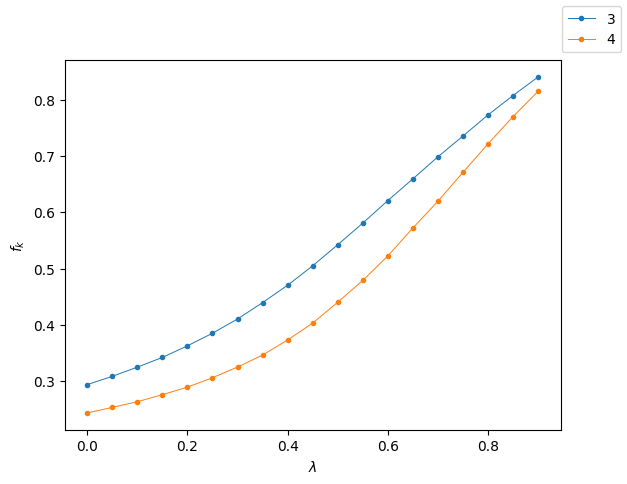

In [4]:
pi = 0.1
qlow = 7.0
qk = 10.0
Nsitess = [3,4]
N = 1000

fig, ax = plt.subplots(constrained_layout=True)

for Nsites in Nsitess:
    df = pd.read_csv(path + f'/results_sim_Nsites_{Nsites}.csv')
    query = 'N == @N & '
    for i in range(1,Nsites):
        query += f'q{i} == @qlow & pi{i} == @pi & '
    query += f'q{Nsites} == @qk & pi{Nsites} == @pi'
    df = df.query(query)
    ax.plot(df['l'], df[f'f{Nsites}'], label=f'{Nsites}', lw=0.7, marker='.')
fig.legend()
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$f_k$')